# Displaying coloured isolines

In this single cell notebook we will see how to display coloured isolines.  

Using **Rainbow method** we can set that every line has different colour. Or to group them.  

If we don't set reference level nor minimum and maximum values for lines, Magics will find minimum and maximum value of the field and put lines at our chosen interval.

### Installing Magics
If you don't have Magics installed, run the next cell to install Magics using conda.

In [ ]:
# Install Magics in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} Magics

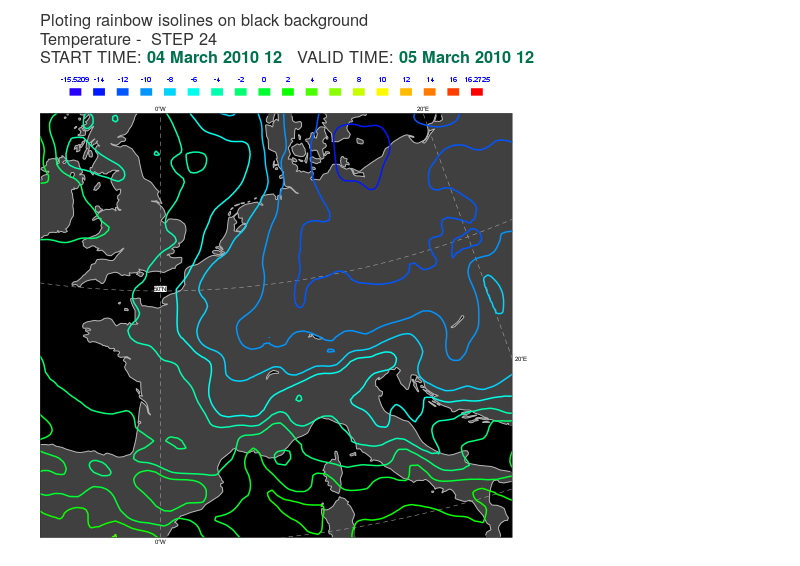

In [1]:
import Magics.macro as magics

#Setting the geographical area
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "central_europe",
    subpage_clipping         = "on",
    page_id_line             = "off"
)

#Setting the coastline
coast = magics.mcoast(
    map_coastline_colour            = "grey",
    map_coastline_resolution        = "medium",
    map_coastline_thickness         = 2,
    map_coastline_land_shade        = "on",
    map_coastline_land_shade_colour = "RGB(0.25,0.25,0.25)",
    map_coastline_sea_shade         = "on",
    map_coastline_sea_shade_colour  = "black",
    map_grid_line_style             = "dash",
    map_grid_colour                 = "grey"
)

#Loading GRIB file
temperature = magics.mgrib(grib_input_file_name = "../../data/t850.grib")

#Defining the contour
t_cont = magics.mcont(
    contour_label                                = "off",
    legend                                       = "on",
    contour_level_selection_type                 = "interval",
    contour_interval                             = 2.00,
    contour_highlight                            = "off",
    contour_line_thickness                       = 3,
    contour_line_colour_rainbow                  = "on",
    contour_line_colour_rainbow_method           = "calculate",
    contour_line_colour_rainbow_max_level_colour = "red",
    contour_line_colour_rainbow_min_level_colour = "purplish_blue",
    contour_line_colour_rainbow_direction        = "clockwise"
)

#Defining the legend
legend = magics.mlegend(legend_display_type   = 'continuous')

#Setting the title
title = magics.mtext( 
    text_lines          = ["Ploting rainbow isolines on black background",
                           "<grib_info key='name'/> -  STEP <grib_info key='step'/>",
                           "START TIME: <font colour='evergreen' style='bold'><grib_info key='base-date' format='%d %B %Y %H'/></font>   VALID TIME: <font colour='evergreen' style='bold'><grib_info key='valid-date' format='%d %B %Y %H'/></font>"],
    text_justification  = 'left',
    text_font_size      = 0.7,
    text_mode           = "automatic",
    text_colour         = "charcoal") 

#Plotting
magics.plot(projection, coast, temperature, t_cont, legend, title)